In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")

In [80]:
train_set = pd.read_json('train.json')
display(train_set.head(5))
print('total number of entries: ', len(train_set))
print('columns: ', train_set.columns)

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


total number of entries:  39774
columns:  Index(['id', 'cuisine', 'ingredients'], dtype='object')


In [81]:
ing_col = train_set.ingredients.values
all_ings = np.concatenate(tuple(ing_col[i] for i in range(len(ing_col))))
unique_ings, counts = np.unique(all_ings, return_counts=True)
print('number of ingredients in dataset: ', len(all_ings))
print('unique number of ingredients in dataset: ', len(unique_ings))

number of ingredients in dataset:  428275
unique number of ingredients in dataset:  6714


cuisine
brazilian        467
british          804
cajun_creole    1546
chinese         2673
filipino         755
french          2646
greek           1175
indian          3003
irish            667
italian         7838
jamaican         526
japanese        1423
korean           830
mexican         6438
moroccan         821
russian          489
southern_us     4320
spanish          989
thai            1539
vietnamese       825
Name: ingredients, dtype: int64

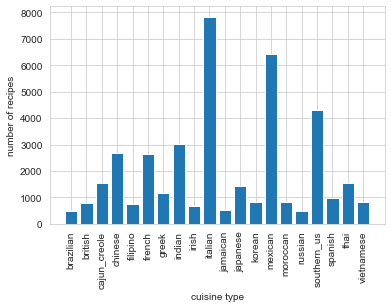

In [63]:
count_by_cuisine = train_set.groupby(['cuisine']).count()
display(count_by_cuisine['ingredients'])

plt.figure()
bars_label = count_by_cuisine.index.values
plt.bar(range(len(bars_label)), count_by_cuisine.ingredients.values)
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.xlabel('cuisine type')
plt.ylabel('number of recipes')
plt.show()

In [64]:
train_set['number_of_ingredients'] = 0
for i in range(len(train_set)):
    train_set.loc[i, 'number_of_ingredients'] = len(train_set.at[i,'ingredients'])
display(train_set)

,id,cuisine,ingredients,number_of_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",12
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",7
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",12
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",21


In [65]:
print('average number of ingredients by cuisine type')
train_set.groupby('cuisine')['number_of_ingredients'].mean()

average number of ingredients by cuisine type


cuisine
brazilian        9.520343
british          9.708955
cajun_creole    12.617076
chinese         11.982791
filipino        10.000000
french           9.817838
greek           10.182128
indian          12.705961
irish            9.299850
italian          9.909033
jamaican        12.214829
japanese         9.735067
korean          11.284337
mexican         10.877446
moroccan        12.909866
russian         10.224949
southern_us      9.634954
spanish         10.423660
thai            12.545809
vietnamese      12.675152
Name: number_of_ingredients, dtype: float64

In [83]:
ing_col_1 = train_set.loc[train_set['cuisine'] == 'brazilian'].ingredients.values
all_ings_1 = np.concatenate(tuple(ing_col_1[i] for i in range(len(ing_col_1))))
unique_ings_1, counts_1 = np.unique(all_ings_1, return_counts=True)
print('number of ingredients in dataset: ', len(all_ings_1))
print('unique number of ingredients in dataset: ', len(unique_ings_1))

number of ingredients in dataset:  4446
unique number of ingredients in dataset:  853


In [117]:
cuisines = train_set['cuisine'].unique()
unique_ingredients_by_cuisine = ['']*len(cuisines)
unique_counts_by_cuisine = ['']*len(cuisines)
i=0
for cuisine in cuisines:
    ingredients_df = train_set.loc[train_set['cuisine'] == cuisine].ingredients.values
    all_ingredients = np.concatenate(tuple(ingredients_df[i] for i in range(len(ingredients_df))))
    unique_ingredients_by_cuisine[i], unique_counts_by_cuisine[i] = np.unique(all_ingredients, return_counts=True)
    i+=1


In [120]:
for i in range(len(cuisines)):
    print('cuisine type: ', cuisines[i])
    print('unique number of ingredients in dataset: ', len(unique_ingredients_by_cuisine[i]))


cuisine type:  greek
unique number of ingredients in dataset:  1198
cuisine type:  southern_us
unique number of ingredients in dataset:  2462
cuisine type:  filipino
unique number of ingredients in dataset:  947
cuisine type:  indian
unique number of ingredients in dataset:  1664
cuisine type:  jamaican
unique number of ingredients in dataset:  877
cuisine type:  spanish
unique number of ingredients in dataset:  1263
cuisine type:  italian
unique number of ingredients in dataset:  2929
cuisine type:  mexican
unique number of ingredients in dataset:  2684
cuisine type:  chinese
unique number of ingredients in dataset:  1792
cuisine type:  british
unique number of ingredients in dataset:  1166
cuisine type:  thai
unique number of ingredients in dataset:  1376
cuisine type:  vietnamese
unique number of ingredients in dataset:  1108
cuisine type:  cajun_creole
unique number of ingredients in dataset:  1576
cuisine type:  brazilian
unique number of ingredients in dataset:  853
cuisine type:

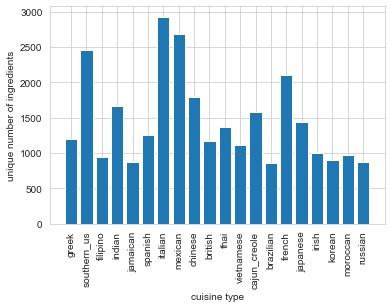

In [123]:
plt.figure()
bars_label = cuisines
plt.bar(range(len(bars_label)), [len(unique_ingredients_by_cuisine[i]) for i in range(len(cuisines))])
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.xlabel('cuisine type')
plt.ylabel('unique number of ingredients')
plt.show()